In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
np.random.seed(0)

In [3]:
n_pts = 500
X, y = datasets.make_circles(n_samples=n_pts, random_state = 123, noise=0.1, factor=0.2)

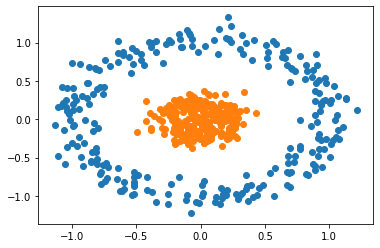

In [4]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [5]:
# Import the Sequential class to create a neural network model.
model = Sequential()
# Adding Dense types of layers. Here, we aim to create 3 layers(i/p, o/p and hidden) of Dense layer
# i/p layer has 2 nodes(input_shape) 
# hidden layer has 4 node(units) 
model.add(Dense(units = 4, input_shape = (2,), activation = 'sigmoid'))
# Here we added the output layer. It has just 1 node(units = 1)
model.add(Dense(units = 1, activation = 'sigmoid'))
# Adam is an optimizer which will be used in the model for optimization and minimizing error. Learning rate is specified by lr.
# Specifying some properties of our model. It will use the adam optimizer. The error(loss) would be of binary cross entropy.
model.compile(Adam(lr = 0.01), 'binary_crossentropy', metrics = ['accuracy'])






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
# Training the model. x and y means the input data and labels respectively.
h = model.fit(x = X, y = y, verbose = 1, batch_size = 20, epochs = 100, shuffle = 'true')




Epoch 1/100





500/500 [==============================] - 0s 855us/step - loss: 0.6959 - acc: 0.5100
Epoch 2/100
500/500 [==============================] - 0s 62us/step - loss: 0.6937 - acc: 0.6200
Epoch 3/100
500/500 [==============================] - 0s 54us/step - loss: 0.6925 - acc: 0.5140
Epoch 4/100
500/500 [==============================] - 0s 48us/step - loss: 0.6916 - acc: 0.6780
Epoch 5/100
500/500 [==============================] - 0s 63us/step - loss: 0.6905 - acc: 0.6320
Epoch 6/100
500/500 [==============================] - 0s 48us/step - loss: 0.6890 - acc: 0.3640
Epoch 7/100
500/500 [==============================] - 0s 54us/step - loss: 0.6865 - acc: 0.6460
Epoch 8/100
500/500 [==============================] - 0s 54us/step - loss: 0.6838 - acc: 0.6740
Epoch 9/100
500/500 [==============================] - 0s 54us/step - loss: 0.6796 - acc: 0.7580
Epoch 10/100
500/500 [==============================] - 0s 56us/step - loss: 0.6733 - acc: 0.7980
Epoch 11/100
500/500

Text(0.5, 0, 'epoch')

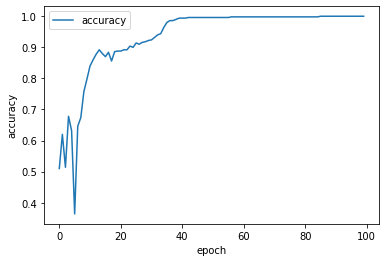

In [7]:
plt.plot(h.history['acc'])
plt.legend(['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

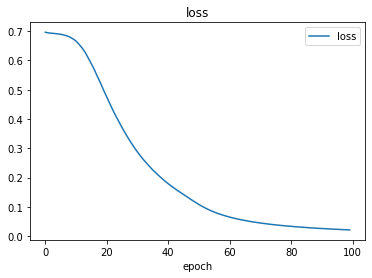

In [8]:
plt.plot(h.history['loss'])
plt.legend(['loss'])
plt.title('loss')
plt.xlabel('epoch')

In [9]:
def plot_decision_boundary(X, y, model):
    # x_span contains 50 horizontal(along x-axis) values spaced at equal intervals ranging from the minimum-0.25 to maximum+0.25. Shape is (50,)
    x_span = np.linspace(min(X[:,0]) - 0.25, max(X[:,0]) + 0.25)
    # y_span contains 50 vertical(along y-axis) values spaced at equal intervals ranging from the minimum-0.25 to maximum+0.25. Shape is (50,)
    y_span = np.linspace(min(X[:,1]) - 0.25, max(X[:,1]) + 0.25)
    # meshgrid creates a rectangular grid(2D array) from 1D array
    # xx contains the repeated copies of x_span in form of identical rows. Shape is (50, 50)
    # yy contains the repeated copies of y_span in form of identical columns. Shape is (50, 50)
    xx, yy = np.meshgrid(x_span, y_span)
    # ravel is somewhat opposite of meshgrid. It is called on a 2D array and returns 1D array. Shape after ravel is (2500, )
    # grid is like our test data. grid contains combined data of ravelled xx and y. Data of xx in the first column and data of yy in second column
    # Shape is (2500, 2).
    grid = np.c_[xx.ravel(), yy.ravel()]
    # We send the grid in the predict function of the model. This model tests all the points inside the grid and returns an array of predictions.
    # These predictions(pred_func) indicate the probability of any given point labelled as 1. Shape is (2500, 1)
    pred_func = model.predict(grid)
    # Reshaping pred_func to resemble shape of xx and yy. Shape is (50, 50)
    z = pred_func.reshape(xx.shape)
    # contourf corelates each specific coordinate with it's repective prediction probability(z).
    # Based on that the function plots distinct contour zones each of which represents a distinct probability level
    plt.contourf(xx, yy, z)

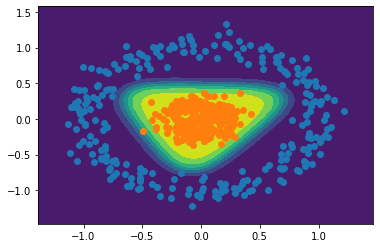

In [10]:
plot_decision_boundary(X, y, model)
# Plotting original data points on the predicted decision boundary based on the grid(test data)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

Prediction is:  [[0.02549436]]


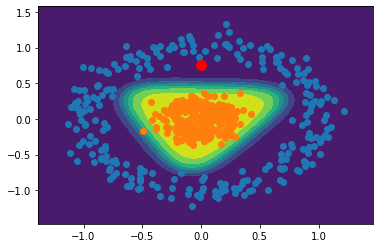

In [11]:
plot_decision_boundary(X, y, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
# Checking the probability of this point belonging to region 1
x = 0
y = 0.75
point = np.array([[x, y]])
predict = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("Prediction is: ", predict)